# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import plotly.express as px

In [ ]:
df = pd.read_excel("Tabular.xlsx", sheet_name="Sheet1")
df

,whole milk,pastry,salty snack,sasauge,yoghurt,semi finished bread,soda,pickled vegetables,misc. beverages,canned beer,...,tropical fruit,sugar,butter milk,speciality chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bangs
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.sum() #jumlah

whole milk              5
pastry                  1
salty snack             1
sasauge                 4
yoghurt                 1
semi finished bread     1
soda                    3
pickled vegetables      1
misc. beverages         1
canned beer             1
hygiene articles        1
rolls/buns              3
frankfurter             2
whipped/sour cream      1
curd                    1
beef                    1
white bread             1
butter                  1
frozen vegetables       1
other vegetables        1
tropical fruit          1
sugar                   1
butter milk             1
speciality chocolate    1
frozen meals            1
dental care             1
root vegetables         1
detergent               1
dish cleaner            1
cling film/bangs        1
dtype: int64

In [ ]:
df.columns #menampilkan semua

Index(['whole milk', 'pastry', 'salty snack', 'sasauge', 'yoghurt',
       'semi finished bread', 'soda', 'pickled vegetables', 'misc. beverages',
       'canned beer', 'hygiene articles', 'rolls/buns', 'frankfurter',
       'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter',
       'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar',
       'butter milk', 'speciality chocolate', 'frozen meals', 'dental care',
       'root vegetables', 'detergent', 'dish cleaner', 'cling film/bangs'],
      dtype='object')

In [ ]:
from itertools import permutations
#tampilan 2 set item
rules = list(permutations(df.columns, 2))
rules

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sasauge'),
 ('whole milk', 'yoghurt'),
 ('whole milk', 'semi finished bread'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'speciality chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bangs'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),


In [ ]:

new_rule = []
for rule in rules:
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    new_rule.append(rule)
new_rule
#kombinasi item

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sasauge'),
 ('whole milk', 'yoghurt'),
 ('whole milk', 'semi finished bread'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pastry'),
 ('sasauge', 'whole milk'),
 ('sasauge', 'yoghurt'),
 ('sasauge', 'semi finished bread'),
 ('sasauge', 'hygiene articles'),
 ('sasauge', 'rolls/buns'),
 ('yoghurt', 'whole milk'),
 ('yoghurt', 'sasauge'),
 ('yoghurt', 'semi finished bread'),
 ('semi finished bread', 'whole milk'),
 ('semi finished bread', 'sasauge'),
 ('semi finished bread', 'yoghurt'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('misc. beverages', 'canned beer'),
 ('canned beer', 'misc. beverages'),
 ('hygiene articles', 'sasauge'),
 ('rolls/buns', 'whole milk'),
 (

In [ ]:
count = {} 
for rule in new_rule:
  data_amount= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  count[str(rule)] = data_amount

count
#hitung kombinasi 

{"('whole milk', 'pastry')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sasauge')": 2,
 "('whole milk', 'yoghurt')": 1,
 "('whole milk', 'semi finished bread')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pastry', 'whole milk')": 1,
 "('pastry', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pastry')": 1,
 "('sasauge', 'whole milk')": 2,
 "('sasauge', 'yoghurt')": 1,
 "('sasauge', 'semi finished bread')": 1,
 "('sasauge', 'hygiene articles')": 1,
 "('sasauge', 'rolls/buns')": 2,
 "('yoghurt', 'whole milk')": 1,
 "('yoghurt', 'sasauge')": 1,
 "('yoghurt', 'semi finished bread')": 1,
 "('semi finished bread', 'whole milk')": 1,
 "('semi finished bread', 'sasauge')": 1,
 "('semi finished bread', 'yoghurt')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('soda', 'whipped/sour cream')": 1,
 "('pickled vegetables', 'soda')": 1,
 

In [ ]:
len(df) #

19

In [ ]:

for item,ab in count.items():
  print(f"{item} support = {ab/len(df)*100}%")

('whole milk', 'pastry') support = 5.263157894736842%
('whole milk', 'salty snack') support = 5.263157894736842%
('whole milk', 'sasauge') support = 10.526315789473683%
('whole milk', 'yoghurt') support = 5.263157894736842%
('whole milk', 'semi finished bread') support = 5.263157894736842%
('whole milk', 'soda') support = 5.263157894736842%
('whole milk', 'rolls/buns') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
('pastry', 'whole milk') support = 5.263157894736842%
('pastry', 'salty snack') support = 5.263157894736842%
('salty snack', 'whole milk') support = 5.263157894736842%
('salty snack', 'pastry') support = 5.263157894736842%
('sasauge', 'whole milk') support = 10.526315789473683%
('sasauge', 'yoghurt') support = 5.263157894736842%
('sasauge', 'semi finished bread') support = 5.263157894736842%
('sasauge', 'hygiene articles') support = 5.263157894736842%
('sasauge', 'rolls/buns') support = 10.526315789473683%
('yoghurt', 'whole milk') support

In [ ]:

for item,ab in count.items():

  i = eval(item) 
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%")

whole milk->pastry  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sasauge  Confidence = 40.0%
whole milk->yoghurt  Confidence = 20.0%
whole milk->semi finished bread  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pastry->whole milk  Confidence = 100.0%
pastry->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 100.0%
salty snack->pastry  Confidence = 100.0%
sasauge->whole milk  Confidence = 50.0%
sasauge->yoghurt  Confidence = 25.0%
sasauge->semi finished bread  Confidence = 25.0%
sasauge->hygiene articles  Confidence = 25.0%
sasauge->rolls/buns  Confidence = 50.0%
yoghurt->whole milk  Confidence = 100.0%
yoghurt->sasauge  Confidence = 100.0%
yoghurt->semi finished bread  Confidence = 100.0%
semi finished bread->whole milk  Confidence = 100.0%
semi finished bread->sasauge  Confidence = 100.0%
semi finished bread->yoghurt  Confidence = 100.0%
soda-

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

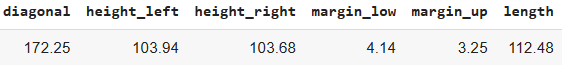
<!-- 1412 -->

In [ ]:
df2 = pd.read_csv("deteksi_uang_palsu.csv")
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [ ]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi


data = {
    'is_genuine': ['TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE'],
    'diagonal': [172.06, 171.66, 172.23, 172.07, 171.79, 172.0, 171.56, 171.9, 171.84, 172.11],
    'height_left': [104.24, 103.68, 104.0, 104.21, 104.57, 104.23, 104.03, 104.33, 104.06, 104.14],
    'height_right': [103.66, 103.41, 103.35, 103.82, 104.04, 104.52, 103.93, 104.4, 104.1, 104.15],
    'margin_low': [4.24, 4.35, 4.43, 4.29, 4.26, 5.76, 5.47, 4.7, 4.87, 4.84],
    'margin_up': [3.1, 3.33, 2.95, 3.35, 3.15, 3.37, 3.5, 3.31, 3.25, 3.28],
    'length': [113.02, 113.74, 113.12, 113.3, 113.46, 110.94, 111.67, 112.12, 111.04, 110.98]
}

target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]
jarak = []
for i in range(len(data['is_genuine'])):
    diagonal = data['diagonal'][i] - target[0]
    height_left = data['height_left'][i] - target[1]
    height_right = data['height_right'][i] - target[2]
    margin_low = data['margin_low'][i] - target[3]
    margin_up = data['margin_up'][i] - target[4]
    length = data['length'][i] - target[5]
    jarak.append(math.sqrt(diagonal**2 + height_left**2 + height_right**2 + margin_low**2 + margin_up**2 + length**2))

print(jarak)

[0.6712674578735285, 1.4583209523283898, 0.8346256645946192, 0.9109335870413307, 1.3125928538583398, 2.42128065287773, 1.741895519254815, 1.113463066293622, 1.722033681435988, 1.7382174777627788]


In [ ]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)
K = round(math.sqrt(len(jarak)))

df = pd.DataFrame(data)
df['jarak'] = jarak
df_sorted = df.sort_values('jarak').head(K)
print(df_sorted)

  is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0       TRUE    172.06       104.24        103.66        4.24       3.10   
2       TRUE    172.23       104.00        103.35        4.43       2.95   
3       TRUE    172.07       104.21        103.82        4.29       3.35   

   length     jarak  
0  113.02  0.671267  
2  113.12  0.834626  
3  113.30  0.910934  


In [ ]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak
k = round(math.sqrt(len(data['is_genuine'])))
indeks_terdekat = sorted(range(len(jarak)), key=lambda k: jarak[k])[:k]
label_terdekat = [data['is_genuine'][i] for i in indeks_terdekat]
label_prediksi = max(set(label_terdekat), key=label_terdekat.count)
print("Hasil prediksi: ", label_prediksi)

Hasil prediksi:  TRUE


# (3) Analisis

> Nama : Andi Yolanda Sagita

> Nim : 2109116023


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# **Business Understanding**

**Background** : Kumpulan data medis yang berisi informasi tentang 768 pasien wanita yang berusia 21 tahun ke atas. Setiap pasien dalam dataset ini memiliki 8 atribut medis dan sebuah label kelas yang menunjukkan apakah pasien tersebut terdiagnosis diabetes atau tidak. Atribut medis meliputi konsentrasi glukosa plasma, tekanan darah sistolik dan diastolik, ketebalan lipatan kulit trisep, kadar insulin serum, indeks massa tubuh, riwayat keluarga diabetes, dan usia pasien.

**Objectives** : Memprediksi secara diagnostik apakah seorang pasien menderita diabetes atau tidak, berdasarkan pada beberapa pengukuran diagnostik yang terdapat dalam dataset.

**Business Success Criteria** : Akurasi yang tinggi dan dapat diandalkan dalam memberikan prediksi yang tepat untuk memfasilitasi keputusan klinis yang lebih baik dalam pengobatan dan manajemen diabetes pada pasien.



**Assess Situation** : Secara keseluruhan, dataset diabetes ini dapat berguna bagi para dokter dan praktisi medis dalam memprediksi diabetes pada pasien mereka. Namun, perlu dilakukan pengolahan data yang benar dan pengembangan model prediksi yang cermat dan valid untuk memastikan kualitas dan validitas prediksi.


**Data Mining Goals** : Untuk memprediksi apakah pasien menderita diabetes atau tidak, berdasarkan pada variabel-variabel yang terdapat dalam dataset.

**Produce Project Plan** : Tahapan persiapan data, modelin, evaluation dan deployment


# **Data Understanding**

Describe Data : Dataset diabetes yang disediakan di Kaggle terdiri dari 9 kolom dan 768 baris. Kolom-kolom tersebut mencakup variabel medis seperti konsentrasi glukosa plasma, tekanan darah, ketebalan lipatan kulit, kadar insulin serum, indeks massa tubuh, riwayat kehamilan, usia, serta variabel target Outcome, yang menunjukkan apakah pasien tersebut menderita diabetes atau tidak.

In [ ]:
df3 = pd.read_csv("diabetes.csv")
df3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
pie_chart = px.pie(df3, names='Pregnancies')
pie_chart.show()
#semua data terdiri dari wanita sehingga perlu data pregnancies sebagai variabel

<Axes: xlabel='Outcome', ylabel='count'>

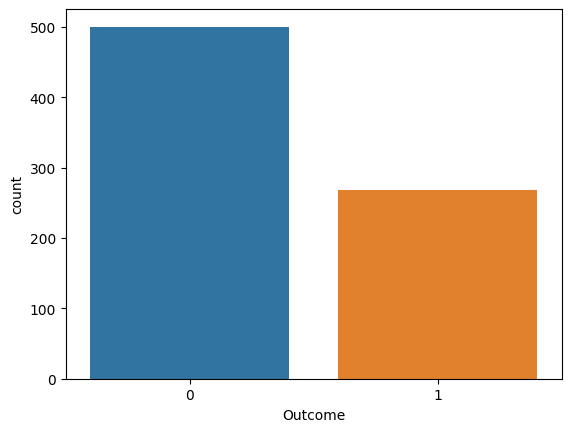

In [ ]:
sns.countplot(x='Outcome', data=df3)
#0 tidak diabet
#1 diabet

array([[<Axes: title={'center': 'BMI'}>]], dtype=object)

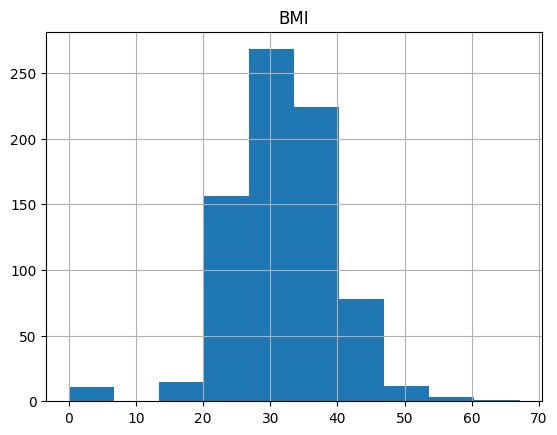

In [ ]:
df3.hist("BMI")
#body mass index

# **Data Preparation**

**Clean Data**

In [ ]:
duplicates = df3[df3.duplicated()]
print(duplicates)

#Tidak ada duplikat

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [ ]:
df3.isnull().sum()

#tidak ada yg kosong

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Construct Data**

In [ ]:
#memeriksa apakah ada data yang tidak numerik

column = df3.select_dtypes(['object', 'category']).columns
print(len(column))

#tidak ada jdi tidak perlu mengubah data ke numerik

0


**Integrate Data**

Tidak ada data yg perlu integrasi

**Format Data**

Tidak ada data yang diubah oleh karena itu data tetap


In [ ]:
df3

,diagonal,height_left,height_right,margin_low,margin_up,length,jarak,is_genuine_FALSE,is_genuine_TRUE
0,172.06,104.24,103.66,4.24,3.10,113.02,0.671267,0,1
1,171.66,103.68,103.41,4.35,3.33,113.74,1.458321,0,1
2,172.23,104.00,103.35,4.43,2.95,113.12,0.834626,0,1
3,172.07,104.21,103.82,4.29,3.35,113.30,0.910934,0,1
4,171.79,104.57,104.04,4.26,3.15,113.46,1.312593,0,1
5,172.00,104.23,104.52,5.76,3.37,110.94,2.421281,1,0
6,171.56,104.03,103.93,5.47,3.50,111.67,1.741896,1,0
7,171.90,104.33,104.40,4.70,3.31,112.12,1.113463,1,0
8,171.84,104.06,104.10,4.87,3.25,111.04,1.722034,1,0
9,172.11,104.14,104.15,4.84,3.28,110.98,1.738217,1,0
